In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


(-0.5, 255.5, 255.5, -0.5)

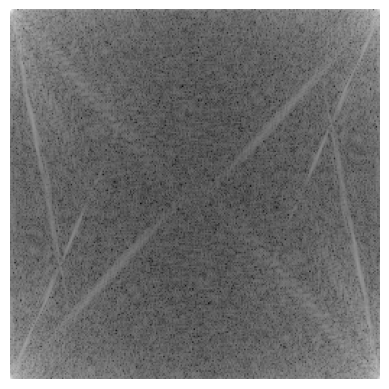

In [2]:
#base on books algorithm

img1 = plt.imread("/content/cameraman.tif")
# img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

image = np.asarray(img1 , dtype = float)
M = image.shape[0]
N = image.shape[1]
x = np.arange(M, dtype = float)
y = np.arange(N, dtype = float)
u = x.reshape((M,1))
v = y.reshape((N,1))
exp_1 = pow(np.e, -2j*np.pi*u*x/M)
exp_2 = pow(np.e, -2j*np.pi*v*y/N)
F = np.dot(exp_2, np.dot(exp_1,image).transpose())/(M*N)
plt.imshow(np.log(abs(F)),cmap='gray')
plt.axis("off")



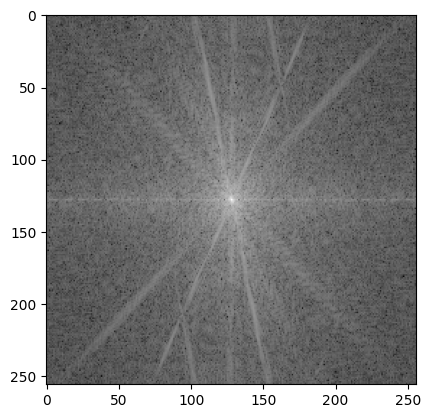

In [3]:
M = (F**2).shape[0]
N = (F**2).shape[1]
m = M/2
m = (np.rint(m)).astype(int)
n = N/2
n = (np.rint(n)).astype(int)
temp = np.zeros((M,N))
temp[-m:,-n:] = np.abs(np.copy((F**2)[:m,:n]))
temp[-m:,:-n] = np.abs(np.copy((F**2)[:m,n:]))
temp[:-m,-n:] = np.abs(np.copy((F**2)[m:,:n]))
temp[:-m,:-n] = np.abs(np.copy((F**2)[m:,n:]))
plt.imshow(np.log(np.abs((temp))),cmap='gray')

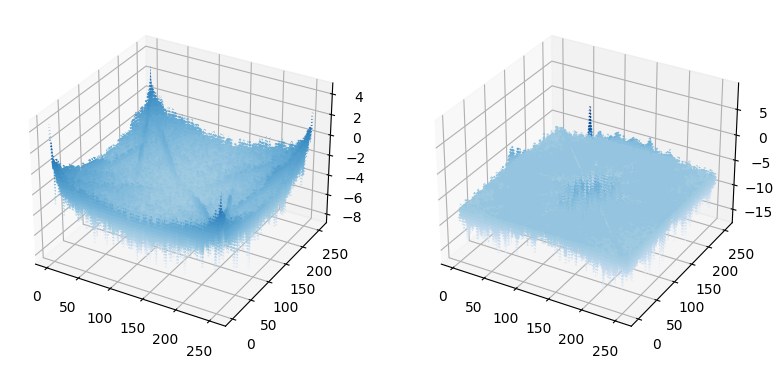

In [5]:
# ax = plt.axes(projection='3d')
t = np.arange(0,256,1)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.contour3D(t,t, np.log(abs(F)),50,cmap='Blues')
ax2.contour3D(t,t, np.log(abs(temp)),50,cmap='Blues')

plt.show()